# SMS Spam Detection Using Machine Learning


---


## Practice Module: Pattern Recognition Systems (PRS)

## Group: 18

## Members:

Lim Jun Ming, A0231523U

Mediana, A0231458E

Yeong Wee Ping, A0231533R

# Traditional Machine Learning Model

# 0. File Path & Library Setup

In [13]:
# !pip uninstall scikit-learn -y

# !pip install -U scikit-learn

In [14]:
# Load All Necessary Packages

import os
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pickle

import sklearn as sk
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,confusion_matrix

seed = 18

print("Versions of key libraries")
print("-------------------------")
print("pandas:      ", pd.__version__)
print("numpy:       ", np.__version__)
print('sklearn:     ', sk.__version__)

Versions of key libraries
-------------------------
pandas:       1.1.5
numpy:        1.19.5
sklearn:      1.0


In [15]:
# Mounting to Google Drive
drive.mount('/content/gdrive')

# Change Working Directory
os.chdir('/content/gdrive/My Drive/iss/prs_pm/training')

print('Working Directory: ')
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Working Directory: 
/content/gdrive/My Drive/iss/prs_pm/training


# 1. Load and Combine Raw Data

## Manual Designed Features

In [16]:
# X Manual Designed Features

X_mfd_file = open('input_data/X_mfd.pickle', 'rb')
X_mfd_pickle = pickle.load(X_mfd_file)
X_train_mfd = X_mfd_pickle[0]
X_val_mfd = X_mfd_pickle[1]
X_test_mfd = X_mfd_pickle[2]
X_mfd_file.close()

print('X Feature Map - Manual Designed Features:')
print('Dimension of X_train : ' + str(X_train_mfd.shape))
print('Dimension of X_val   : ' + str(X_val_mfd.shape))
print('Dimension of X_test  : ' + str(X_test_mfd.shape))
print('------------------------------------------\n')

X Feature Map - Manual Designed Features:
Dimension of X_train : (4085, 6)
Dimension of X_val   : (876, 6)
Dimension of X_test  : (876, 6)
------------------------------------------



## BOW - CountVectorizer

In [17]:
# X BOW CountVectorizer

X_cv_file = open('input_data/X_cv.pickle', 'rb')
X_cv_pickle = pickle.load(X_cv_file)
X_train_cv = X_cv_pickle[0]
X_val_cv = X_cv_pickle[1]
X_test_cv = X_cv_pickle[2]
X_cv_file.close()
print('X Feature Map - BOW CountVectorizer:')
print('Dimension of X_train : ' + str(X_train_cv.shape))
print('Dimension of X_val   : ' + str(X_val_cv.shape))
print('Dimension of X_test  : ' + str(X_test_cv.shape))
print('------------------------------------------\n')

X Feature Map - BOW CountVectorizer:
Dimension of X_train : (4085, 6390)
Dimension of X_val   : (876, 6390)
Dimension of X_test  : (876, 6390)
------------------------------------------



## BOW - TfIdf Vectorizer

In [18]:
# X BOW TfIdf Vectorizer

X_tfidf_file = open('input_data/X_tfidf.pickle', 'rb')
X_tfidf_pickle = pickle.load(X_tfidf_file)
X_train_tfidf = X_tfidf_pickle[0]
X_val_tfidf = X_tfidf_pickle[1]
X_test_tfidf = X_tfidf_pickle[2]
X_tfidf_file.close()
print('X Feature Map - BOW TfIdf Vectorizer:')
print('Dimension of X_train : ' + str(X_train_tfidf.shape))
print('Dimension of X_val   : ' + str(X_val_tfidf.shape))
print('Dimension of X_test  : ' + str(X_test_tfidf.shape))
print('------------------------------------------\n')

X Feature Map - BOW TfIdf Vectorizer:
Dimension of X_train : (4085, 6390)
Dimension of X_val   : (876, 6390)
Dimension of X_test  : (876, 6390)
------------------------------------------



## y Labels

In [19]:
# y Labels
y_label_file = open('input_data/y_label.pickle', 'rb')
y_label_pickle = pickle.load(y_label_file)
y_train = y_label_pickle[0]
y_val = y_label_pickle[1]
y_test = y_label_pickle[2]
y_label_file.close()
print('Label Dataset:')
print('Dimension of y_train : ' + str(y_train.shape))
print('Dimension of y_val   : ' + str(y_val.shape))
print('Dimension of y_test  : ' + str(y_test.shape))
print('------------------------------------------\n')

Label Dataset:
Dimension of y_train : (4085,)
Dimension of y_val   : (876,)
Dimension of y_test  : (876,)
------------------------------------------



In [12]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [11]:
# Initialization
X_labels = ['Manual', 'CountVect', 'TfIdf'] # List of Descriptions of X feature map
X_train = [X_train_mfd, X_train_cv, X_train_tfidf] # List of X feature map for training
X_val = [X_val_mfd, X_val_cv, X_val_tfidf] # List of X feature map for validation
X_test = [X_test_mfd, X_test_cv, X_test_tfidf] # List of X feature map for testing

# Traditional Models

## 1) Naive Bayes Classifier

### i. Model Training

In [ ]:
# Parameters Setup
metrics = ['Input Feature Types', 'Training Accuracy', 'Validation Accuracy', 'F1-Score', 'AUC Score'] # Indicates the metrics for evaluation
modelname = 'NaiveBayes'

# Initialize Containers to store various metrics results
labels = []
tr_acc = []
tv_acc = []
F1 = []
auc = []
fpr = []
tpr = []

for i in range(len(X_labels)):
  labels.append(X_labels[i])

  NB = MultinomialNB()
  NB_fit = NB.fit(X_train[i], y_train)

  # Predictions
  NB_trpred = NB.predict(X_train[i])
  NB_trprob = NB.predict_proba(X_train[i])
  NB_tvpred = NB.predict(X_val[i])
  NB_tvprob = NB.predict_proba(X_val[i])

  # Accuracies  
  tr_acc.append(accuracy_score(y_train, NB_trpred))
  tv_acc.append(accuracy_score(y_val, NB_tvpred))
  
  # F1 Score
  F1.append(f1_score(y_val, NB_tvpred))

  # AUC Score
  auc.append(roc_auc_score(y_val, NB_tvprob[:,1]))

# Training Evaluation Results
NB_val_sumarr = np.array([labels, tr_acc, tv_acc, F1, auc]).transpose()
NB_val_sum = pd.DataFrame(NB_val_sumarr, columns=metrics)
for i in metrics[1:]:
  NB_val_sum[i] = NB_val_sum[i].apply(lambda x: round(float(x),3))

# Save Training Evaluation Results
folderpath = 'model/trad_model/hyperparameter_tuning/'
filepath = folderpath + modelname + '.csv'
NB_val_sum.to_csv(filepath, index=False)

display(NB_val_sum)

,Input Feature Types,Training Accuracy,Validation Accuracy,F1-Score,AUC Score
0,Manual,0.955,0.955,0.842,0.815
1,CountVect,0.989,0.977,0.928,0.982
2,TfIdf,0.986,0.955,0.868,0.980


### ii. Model Evaluation

,Input Feature Types,Training Accuracy,Testing Accuracy,F1-Score,AUC Score
0,Manual,0.955,0.958,0.853,0.815
1,CountVect,0.989,0.971,0.914,0.989
2,TfIdf,0.986,0.960,0.884,0.985


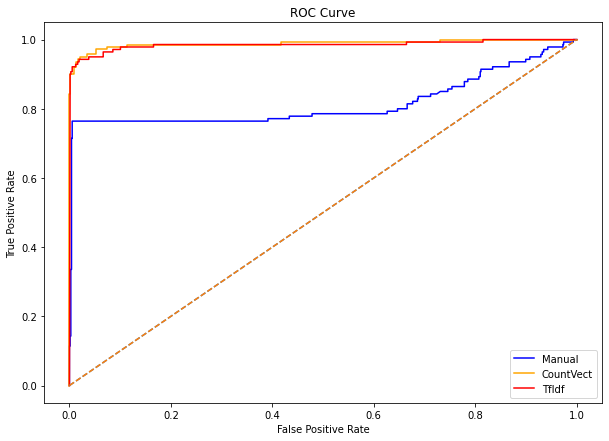

In [20]:
# Parameters Setup
metrics = ['Input Feature Types', 'Training Accuracy', 'Testing Accuracy', 'F1-Score', 'AUC Score'] # Indicates the metrics for evaluation
modelname = 'NaiveBayes'
colors = ['blue', 'orange', 'red'] # Indicates the corresponding color to represent in plot results

# Naive Bayes in Manually Designed Features
NB_mfd = MultinomialNB()
NB_mfd_fit = NB_mfd.fit(X_train_mfd, y_train)
NB_mfd_trpred = NB_mfd.predict(X_train_mfd)
NB_mfd_tspred = NB_mfd.predict(X_test_mfd)
NB_mfd_tsprob = NB_mfd.predict_proba(X_test_mfd)
NB_mfd_tracc = accuracy_score(y_train, NB_mfd_trpred)
NB_mfd_tsacc = accuracy_score(y_test, NB_mfd_tspred)
NB_mfd_f1 = f1_score(y_test, NB_mfd_tspred)
NB_mfd_auc = roc_auc_score(y_test, NB_mfd_tsprob[:,1])
NB_mfd_fpr, NB_mfd_tpr, _ = roc_curve(y_test, NB_mfd_tsprob[:,1])

# Naive Bayes in CountVectorizer Features
NB_cv = MultinomialNB()
NB_cv_fit = NB_cv.fit(X_train_cv, y_train)
NB_cv_trpred = NB_cv.predict(X_train_cv)
NB_cv_tspred = NB_cv.predict(X_test_cv)
NB_cv_tsprob = NB_cv.predict_proba(X_test_cv)
NB_cv_tracc = accuracy_score(y_train, NB_cv_trpred)
NB_cv_tsacc = accuracy_score(y_test, NB_cv_tspred)
NB_cv_f1 = f1_score(y_test, NB_cv_tspred)
NB_cv_auc = roc_auc_score(y_test, NB_cv_tsprob[:,1])
NB_cv_fpr, NB_cv_tpr, _ = roc_curve(y_test, NB_cv_tsprob[:,1])

# Naive Bayes in TfIdf Vectorizer Features
NB_tfidf = MultinomialNB()
NB_tfidf_fit = NB_tfidf.fit(X_train_tfidf, y_train)
NB_tfidf_trpred = NB_tfidf.predict(X_train_tfidf)
NB_tfidf_tspred = NB_tfidf.predict(X_test_tfidf)
NB_tfidf_tsprob = NB_tfidf.predict_proba(X_test_tfidf)
NB_tfidf_tracc = accuracy_score(y_train, NB_tfidf_trpred)
NB_tfidf_tsacc = accuracy_score(y_test, NB_tfidf_tspred)
NB_tfidf_f1 = f1_score(y_test, NB_tfidf_tspred)
NB_tfidf_auc = roc_auc_score(y_test, NB_tfidf_tsprob[:,1])
NB_tfidf_fpr, NB_tfidf_tpr, _ = roc_curve(y_test, NB_tfidf_tsprob[:,1])

NB_tracc = [NB_mfd_tracc, NB_cv_tracc, NB_tfidf_tracc]
NB_tsacc = [NB_mfd_tsacc, NB_cv_tsacc, NB_tfidf_tsacc]
NB_f1 = [NB_mfd_f1, NB_cv_f1, NB_tfidf_f1]
NB_auc = [NB_mfd_auc, NB_cv_auc, NB_tfidf_auc]
NB_labels = ['Manual', 'CountVect', 'TfIdf']
NB_fpr = [NB_mfd_fpr, NB_cv_fpr, NB_tfidf_fpr]
NB_tpr = [NB_mfd_tpr, NB_cv_tpr, NB_tfidf_tpr]

# Model Test Dataset Evaluation
NB_sumarr = np.array([NB_labels, NB_tracc, NB_tsacc, NB_f1, NB_auc]).transpose()
NB_sum = pd.DataFrame(NB_sumarr, columns=metrics)
for i in metrics[1:]:
  NB_sum[i] = NB_sum[i].apply(lambda x: round(float(x),3))

# Save Test Dataset Evaluation to File
folderpath = 'model/trad_model/model_evaluation/'
filepath = folderpath + modelname + '.csv'
NB_sum.to_csv(filepath, index=False)
display(NB_sum)

# Plot of ROC Curve
plt.figure(figsize=(10,7))
for i in np.arange(len(X_labels)):
  plt.plot(NB_fpr[i],NB_tpr[i], label=NB_labels[i], color=colors[i])
plt.plot([(0,0), (1,1)], linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### iii. Save Model

In [23]:
# Saving criteria Testing Acc >= 0.96, F1-Score >= 0.91
# NB with CountVectorizer
folderpath = 'model/trad_model/model_pickle/'
modelname = 'NB_CV'
filepath = open(folderpath + modelname + '.pickle', 'wb')
pickle.dump(NB_cv, filepath)
filepath.close()

## 2) Logistic Regression Classifier

### i. Model Training

In [ ]:
# Parameters Setup
metrics = ['Input Feature Types', 'Regularization Strength', 'Training Accuracy', 'Validation Accuracy', 'F1-Score', 'AUC Score']
reg_str = [3, 2, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001] # different regularization strength to try out
modelname = 'LogisticRegresion'

# Initialize
labels = []
reg = []
tr_acc = []
tv_acc = []
F1 = []
auc = []
fpr = []
tpr = []

for i in range(len(X_labels)):
  for r in reg_str:
    labels.append(X_labels[i])
    reg.append(r)

    lr = LogisticRegression(C=r)
    lr_fit = lr.fit(X_train[i], y_train)

    # Predictions
    lr_trpred = lr.predict(X_train[i])
    lr_tvpred = lr.predict(X_val[i])
    lr_tvprob = lr.predict_proba(X_val[i])

    # Accuracies  
    tr_acc.append(accuracy_score(y_train, lr_trpred))
    tv_acc.append(accuracy_score(y_val, lr_tvpred))
    
    # F1 Score
    F1.append(f1_score(y_val, lr_tvpred))

    # AUC Score
    auc.append(roc_auc_score(y_val, lr_tvprob[:,1]))

# Training Evaluation Results
lr_val_sumarr = np.array([labels, reg, tr_acc, tv_acc, F1, auc]).transpose()
lr_val_sum = pd.DataFrame(lr_val_sumarr, columns=metrics)
for i in metrics[2:]:
  lr_val_sum[i] = lr_val_sum[i].apply(lambda x: round(float(x),3))

# Save Training Evaluation Results
folderpath = 'model/trad_model/hyperparameter_tuning/'
filepath = folderpath + modelname + '.csv'
lr_val_sum.to_csv(filepath, index=False)

display(lr_val_sum)

,Input Feature Types,Regularization Strength,Training Accuracy,Validation Accuracy,F1-Score,AUC Score
0,Manual,3,0.969,0.970,0.902,0.981
1,Manual,2,0.970,0.969,0.897,0.981
2,Manual,1,0.967,0.969,0.897,0.981
3,Manual,0.3,0.962,0.963,0.874,0.980
4,Manual,0.1,0.956,0.955,0.842,0.979
5,Manual,0.03,0.955,0.955,0.842,0.979
6,Manual,0.01,0.948,0.954,0.835,0.979
7,Manual,0.003,0.840,0.839,0.000,0.979
8,Manual,0.001,0.840,0.839,0.000,0.980
9,CountVect,3,0.998,0.981,0.936,0.991


### ii. Hyperparameter Tuning

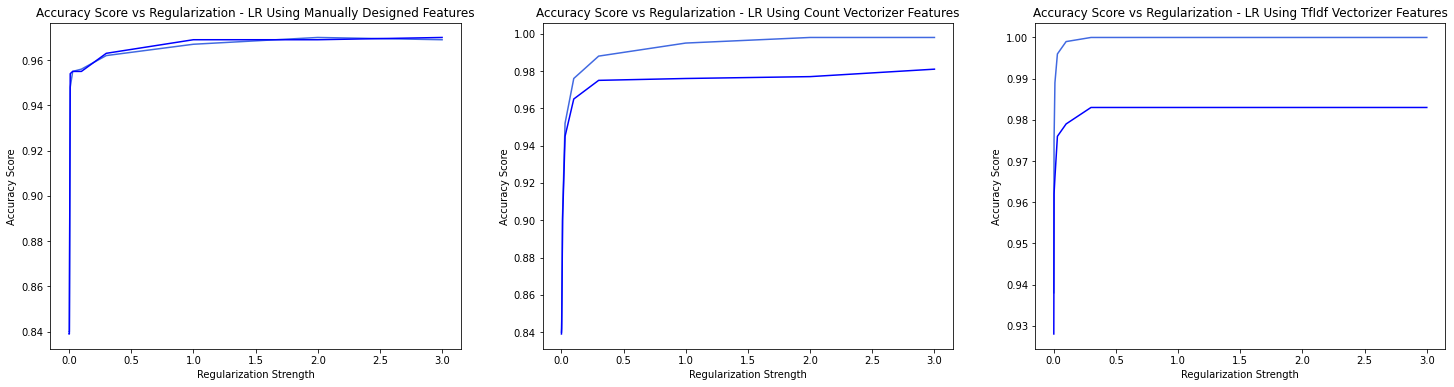

In [ ]:
# Initialize Plot
plt.figure(figsize=(25,6))

# Plot Accuracies vs Regularization Strength for Logistic Regression using manually designed features
plt.subplot(131)
mfd_train_acc = lr_val_sum['Training Accuracy'][lr_val_sum['Input Feature Types'] == 'Manual']
mfd_test_acc = lr_val_sum['Validation Accuracy'][lr_val_sum['Input Feature Types'] == 'Manual']
plt.plot(reg_str, mfd_train_acc, color='royalblue')
plt.plot(reg_str, mfd_test_acc, color='blue')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Regularization - LR Using Manually Designed Features')

# Plot Accuracies vs Regularization Strength for Logistic Regression using CountVectorizer features map
plt.subplot(132)
cv_train_acc = lr_val_sum['Training Accuracy'][lr_val_sum['Input Feature Types'] == 'CountVect']
cv_test_acc = lr_val_sum['Validation Accuracy'][lr_val_sum['Input Feature Types'] == 'CountVect']
plt.plot(reg_str, cv_train_acc, color='royalblue')
plt.plot(reg_str, cv_test_acc, color='blue')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Regularization - LR Using Count Vectorizer Features')

# Plot Accuracies vs Regularization Strength for Logistic Regression using Tfidf features map
plt.subplot(133)
tfidf_train_acc = lr_val_sum['Training Accuracy'][lr_val_sum['Input Feature Types'] == 'TfIdf']
tfidf_test_acc = lr_val_sum['Validation Accuracy'][lr_val_sum['Input Feature Types'] == 'TfIdf']
plt.plot(reg_str, tfidf_train_acc, color='royalblue')
plt.plot(reg_str, tfidf_test_acc, color='blue')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Regularization - LR Using TfIdf Vectorizer Features')

plt.show()


### iii. Model Evaluation

,Input Feature Types,Regularization Strength,Training Accuracy,Testing Accuracy,F1-Score,AUC Score
0,Manual,3,0.969,0.967,0.895,0.987
1,CountVect,0.3,0.988,0.970,0.903,0.991
2,TfIdf,0.03,0.996,0.971,0.904,0.993


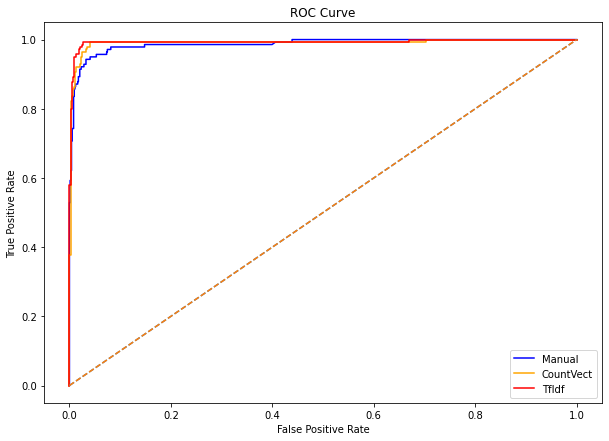

In [25]:
# Parameters Setup
metrics = ['Input Feature Types', 'Regularization Strength', 'Training Accuracy', 'Testing Accuracy', 'F1-Score', 'AUC Score']
modelname = 'LogisticRegresion'
colors = ['blue', 'orange', 'red'] # indicates the corresponding color to represent in plot results

# Using C=3 for LR in Manually Designed Features
lr_mfd = LogisticRegression(C=3)
lr_mfd_fit = lr_mfd.fit(X_train_mfd, y_train)
lr_mfd_trpred = lr_mfd.predict(X_train_mfd)
lr_mfd_tspred = lr_mfd.predict(X_test_mfd)
lr_mfd_tsprob = lr_mfd.predict_proba(X_test_mfd)
lr_mfd_tracc = accuracy_score(y_train, lr_mfd_trpred)
lr_mfd_tsacc = accuracy_score(y_test, lr_mfd_tspred)
lr_mfd_f1 = f1_score(y_test, lr_mfd_tspred)
lr_mfd_auc = roc_auc_score(y_test, lr_mfd_tsprob[:,1])
lr_mfd_fpr, lr_mfd_tpr, _ = roc_curve(y_test, lr_mfd_tsprob[:,1])

# Using C=0.3 for LR in CountVectorizer Features
lr_cv = LogisticRegression(C=0.3)
lr_cv_fit = lr_cv.fit(X_train_cv, y_train)
lr_cv_trpred = lr_cv.predict(X_train_cv)
lr_cv_tspred = lr_cv.predict(X_test_cv)
lr_cv_tsprob = lr_cv.predict_proba(X_test_cv)
lr_cv_tracc = accuracy_score(y_train, lr_cv_trpred)
lr_cv_tsacc = accuracy_score(y_test, lr_cv_tspred)
lr_cv_f1 = f1_score(y_test, lr_cv_tspred)
lr_cv_auc = roc_auc_score(y_test, lr_cv_tsprob[:,1])
lr_cv_fpr, lr_cv_tpr, _ = roc_curve(y_test, lr_cv_tsprob[:,1])

# Using C=0.03 for LR in TfIdf Vectorizer Features
lr_tfidf = LogisticRegression(C=0.03)
lr_tfidf_fit = lr_tfidf.fit(X_train_tfidf, y_train)
lr_tfidf_trpred = lr_tfidf.predict(X_train_tfidf)
lr_tfidf_tspred = lr_tfidf.predict(X_test_tfidf)
lr_tfidf_tsprob = lr_tfidf.predict_proba(X_test_tfidf)
lr_tfidf_tracc = accuracy_score(y_train, lr_tfidf_trpred)
lr_tfidf_tsacc = accuracy_score(y_test, lr_tfidf_tspred)
lr_tfidf_f1 = f1_score(y_test, lr_tfidf_tspred)
lr_tfidf_auc = roc_auc_score(y_test, lr_tfidf_tsprob[:,1])
lr_tfidf_fpr, lr_tfidf_tpr, _ = roc_curve(y_test, lr_tfidf_tsprob[:,1])

lr_tracc = [lr_mfd_tracc, lr_cv_tracc, lr_tfidf_tracc]
lr_tsacc = [lr_mfd_tsacc, lr_cv_tsacc, lr_tfidf_tsacc]
lr_f1 = [lr_mfd_f1, lr_cv_f1, lr_tfidf_f1]
lr_auc = [lr_mfd_auc, lr_cv_auc, lr_tfidf_auc]
lr_c = [3, 0.3, 0.03]
lr_labels = ['Manual', 'CountVect', 'TfIdf']
lr_fpr = [lr_mfd_fpr, lr_cv_fpr, lr_tfidf_fpr]
lr_tpr = [lr_mfd_tpr, lr_cv_tpr, lr_tfidf_tpr]

# Displaying final model evaluation
lr_sumarr = np.array([lr_labels, lr_c, lr_tracc, lr_tsacc, lr_f1, lr_auc]).transpose()
lr_sum = pd.DataFrame(lr_sumarr, columns=metrics)
for i in metrics[2:]:
  lr_sum[i] = lr_sum[i].apply(lambda x: round(float(x),3))

# Save Test Dataset Evaluation to File
folderpath = 'model/trad_model/model_evaluation/'
filepath = folderpath + modelname + '.csv'
lr_sum.to_csv(filepath, index=False)
display(lr_sum)

# Plot of ROC Curve
plt.figure(figsize=(10,7))
for i in np.arange(len(X_labels)):
  plt.plot(lr_fpr[i],lr_tpr[i], label=lr_labels[i], color=colors[i])
plt.plot([(0,0), (1,1)], linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### iv. Save Model

In [ ]:
# Saving criteria Testing Acc >= 0.96, F1-Score >= 0.91
# No lr model passes the criteria

## 3) Random Forest

### i. Model Training

In [ ]:
# Parameters Setup
metrics = ['Input Feature Types', 'Number of Trees', 'Max Features Per Tree', 'Training Accuracy', 'Validation Accuracy', 'F1-Score', 'AUC Score']
n_trees = [3,5,10,25,50] # number of trees in RF to try out
n_features = [1,2,4,10,20,50] # number of features per tree to try out
modelname = 'RandomForest'

# Initialize
labels = []
tree = []
feature = []
tr_acc = []
tv_acc = []
F1 = []
auc = []
fpr = []
tpr = []

for i in range(len(X_labels)):
  for t in n_trees:
    for f in n_features:
      if f <= X_train[i].shape[1]:
        labels.append(X_labels[i])
        tree.append(t)
        feature.append(f)

        rf = RandomForestClassifier(n_estimators=t, max_features=f)
        rf_fit = rf.fit(X_train[i], y_train)

        # Predictions
        rf_trpred = rf.predict(X_train[i])
        rf_tvpred = rf.predict(X_val[i])
        rf_tvprob = rf.predict_proba(X_val[i])

        # Accuracies  
        tr_acc.append(accuracy_score(y_train, rf_trpred))
        tv_acc.append(accuracy_score(y_val, rf_tvpred))
        
        # F1 Score
        F1.append(f1_score(y_val, rf_tvpred))

        # AUC Score
        auc.append(roc_auc_score(y_val, rf_tvprob[:,1]))

# Training Evaluation Results
rf_val_sumarr = np.array([labels, tree, feature, tr_acc, tv_acc, F1, auc]).transpose()
rf_val_sum = pd.DataFrame(rf_val_sumarr, columns=metrics)
for i in metrics[3:]:
  rf_val_sum[i] = rf_val_sum[i].apply(lambda x: round(float(x),3))

# Save Training Evaluation Results
folderpath = 'model/trad_model/hyperparameter_tuning/'
filepath = folderpath + modelname + '.csv'
rf_val_sum.to_csv(filepath, index=False)

display(rf_val_sum)

,Input Feature Types,Number of Trees,Max Features Per Tree,Training Accuracy,Validation Accuracy,F1-Score,AUC Score
0,Manual,3,1,0.988,0.967,0.894,0.953
1,Manual,3,2,0.988,0.974,0.916,0.935
2,Manual,3,4,0.991,0.967,0.895,0.949
3,Manual,5,1,0.992,0.973,0.913,0.952
4,Manual,5,2,0.991,0.976,0.923,0.954
...,...,...,...,...,...,...,...
70,TfIdf,50,2,1.000,0.952,0.825,0.992
71,TfIdf,50,4,1.000,0.959,0.854,0.995
72,TfIdf,50,10,1.000,0.961,0.863,0.995
73,TfIdf,50,20,1.000,0.966,0.881,0.994


### ii. Model Evaluation

,Input Feature Types,Number of Trees,Max Features Per Tree,Training Accuracy,Testing Accuracy,F1-Score,AUC Score
0,Manual,50,1,0.994,0.973,0.917,0.987
1,CountVect,10,20,0.995,0.960,0.859,0.990
2,TfIdf,10,50,0.997,0.959,0.856,0.982


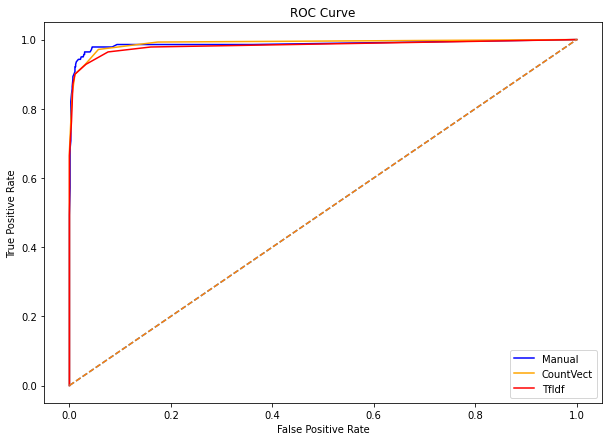

In [29]:
# Parameters Setup
metrics = ['Input Feature Types', 'Number of Trees', 'Max Features Per Tree', 'Training Accuracy', 'Testing Accuracy', 'F1-Score', 'AUC Score']
modelname = 'RandomForest'
colors = ['blue', 'orange', 'red'] # indicates the corresponding color to represent in plot results

# Using num_tree=50, max_feature=1 for RF in Manually Designed Features
rf_mfd = RandomForestClassifier(n_estimators=50, max_features=1)
rf_mfd_fit = rf_mfd.fit(X_train_mfd, y_train)
rf_mfd_trpred = rf_mfd.predict(X_train_mfd)
rf_mfd_tspred = rf_mfd.predict(X_test_mfd)
rf_mfd_tsprob = rf_mfd.predict_proba(X_test_mfd)
rf_mfd_tracc = accuracy_score(y_train, rf_mfd_trpred)
rf_mfd_tsacc = accuracy_score(y_test, rf_mfd_tspred)
rf_mfd_f1 = f1_score(y_test, rf_mfd_tspred)
rf_mfd_auc = roc_auc_score(y_test, rf_mfd_tsprob[:,1])
rf_mfd_fpr, rf_mfd_tpr, _ = roc_curve(y_test, rf_mfd_tsprob[:,1])

# Using num_tree=10, max_feature=20 for RF in CountVectorizer Features
rf_cv = RandomForestClassifier(n_estimators=10, max_features=20)
rf_cv_fit = rf_cv.fit(X_train_cv, y_train)
rf_cv_trpred = rf_cv.predict(X_train_cv)
rf_cv_tspred = rf_cv.predict(X_test_cv)
rf_cv_tsprob = rf_cv.predict_proba(X_test_cv)
rf_cv_tracc = accuracy_score(y_train, rf_cv_trpred)
rf_cv_tsacc = accuracy_score(y_test, rf_cv_tspred)
rf_cv_f1 = f1_score(y_test, rf_cv_tspred)
rf_cv_auc = roc_auc_score(y_test, rf_cv_tsprob[:,1])
rf_cv_fpr, rf_cv_tpr, _ = roc_curve(y_test, rf_cv_tsprob[:,1])

# Using num_tree=10, max_feature=50 for RF in TfIdf Vectorizer Features
rf_tfidf = RandomForestClassifier(n_estimators=10, max_features=50)
rf_tfidf_fit = rf_tfidf.fit(X_train_tfidf, y_train)
rf_tfidf_trpred = rf_tfidf.predict(X_train_tfidf)
rf_tfidf_tspred = rf_tfidf.predict(X_test_tfidf)
rf_tfidf_tsprob = rf_tfidf.predict_proba(X_test_tfidf)
rf_tfidf_tracc = accuracy_score(y_train, rf_tfidf_trpred)
rf_tfidf_tsacc = accuracy_score(y_test, rf_tfidf_tspred)
rf_tfidf_f1 = f1_score(y_test, rf_tfidf_tspred)
rf_tfidf_auc = roc_auc_score(y_test, rf_tfidf_tsprob[:,1])
rf_tfidf_fpr, rf_tfidf_tpr, _ = roc_curve(y_test, rf_tfidf_tsprob[:,1])

rf_tracc = [rf_mfd_tracc, rf_cv_tracc, rf_tfidf_tracc]
rf_tsacc = [rf_mfd_tsacc, rf_cv_tsacc, rf_tfidf_tsacc]
rf_f1 = [rf_mfd_f1, rf_cv_f1, rf_tfidf_f1]
rf_auc = [rf_mfd_auc, rf_cv_auc, rf_tfidf_auc]
rf_tree = [50, 10, 10]
rf_feature = [1, 20, 50]
rf_labels = ['Manual', 'CountVect', 'TfIdf']
rf_fpr = [rf_mfd_fpr, rf_cv_fpr, rf_tfidf_fpr]
rf_tpr = [rf_mfd_tpr, rf_cv_tpr, rf_tfidf_tpr]

# Displaying final model evaluation
rf_sumarr = np.array([rf_labels, rf_tree, rf_feature, rf_tracc, rf_tsacc, rf_f1, rf_auc]).transpose()
rf_sum = pd.DataFrame(rf_sumarr, columns=metrics)
for i in metrics[3:]:
  rf_sum[i] = rf_sum[i].apply(lambda x: round(float(x),3))

# Save Test Dataset Evaluation to File
folderpath = 'model/trad_model/model_evaluation/'
filepath = folderpath + modelname + '.csv'
rf_sum.to_csv(filepath, index=False)
display(rf_sum)

# Plot of ROC Curve
plt.figure(figsize=(10,7))
for i in np.arange(len(X_labels)):
  plt.plot(rf_fpr[i],rf_tpr[i], label=rf_labels[i], color=colors[i])
plt.plot([(0,0), (1,1)], linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### iii. Save Model

In [30]:
# Saving criteria Testing Acc >= 0.96, F1-Score >= 0.91
# Random Forest with Manually Designed Features
# folderpath = 'model/trad_model/model_pickle/'
# modelname = 'rf_mfd'
# filepath = open(folderpath + modelname + '.pickle', 'wb')
# pickle.dump(rf_mfd, filepath)
# filepath.close()

# Not used even passed criteria due to model might be overfitted as shown in training accuracy 

## 4) Support Vector Machine (SVM)

### i. Model Training

In [ ]:
# Parameters Setup
metrics = ['Input Feature Types', 'Gamma', 'Training Accuracy', 'Validation Accuracy', 'F1-Score', 'AUC Score']
kernel = 'sigmoid' # Using sigmoid kernal as this is a binary classfication problem
gam = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3] # gamma to try out
modelname = 'SVM'

# Initialize
labels = []
gamma = []
tr_acc = []
tv_acc = []
F1 = []
auc = []
fpr = []
tpr = []

for i in range(len(X_labels)):
  for g in gam:
    labels.append(X_labels[i])
    gamma.append(g)

    svm = SVC(kernel=kernel, gamma=g, probability=True)
    svm_fit = svm.fit(X_train[i], y_train)

    # Predictions
    svm_trpred = svm.predict(X_train[i])
    svm_tvpred = svm.predict(X_val[i])
    svm_tvprob = svm.predict_proba(X_val[i])

    # Accuracies  
    tr_acc.append(accuracy_score(y_train, svm_trpred))
    tv_acc.append(accuracy_score(y_val, svm_tvpred))
    
    # F1 Score
    F1.append(f1_score(y_val, svm_tvpred))

    # AUC Score
    auc.append(roc_auc_score(y_val, svm_tvprob[:,1]))
    
# Training Evaluation Results
svm_val_sumarr = np.array([labels, gamma, tr_acc, tv_acc, F1, auc]).transpose()
svm_val_sum = pd.DataFrame(svm_val_sumarr, columns=metrics)
for i in metrics[2:]:
  svm_val_sum[i] = svm_val_sum[i].apply(lambda x: round(float(x),3))

# Save Training Evaluation Results
folderpath = 'model/trad_model/hyperparameter_tuning/'
filepath = folderpath + modelname + '.csv'
svm_val_sum.to_csv(filepath, index=False)

display(svm_val_sum)

,Input Feature Types,Gamma,Training Accuracy,Validation Accuracy,F1-Score,AUC Score
0,Manual,0.0001,0.840,0.839,0.000,0.981
1,Manual,0.0003,0.840,0.839,0.000,0.981
2,Manual,0.001,0.840,0.839,0.000,0.981
3,Manual,0.003,0.955,0.955,0.842,0.981
4,Manual,0.01,0.955,0.955,0.842,0.982
5,Manual,0.03,0.955,0.955,0.842,0.981
6,Manual,0.1,0.955,0.955,0.842,0.981
7,Manual,0.3,0.963,0.966,0.883,0.981
8,Manual,1,0.966,0.968,0.893,0.978
9,Manual,3,0.956,0.957,0.857,0.976


### ii. Hyperparameter Tuning

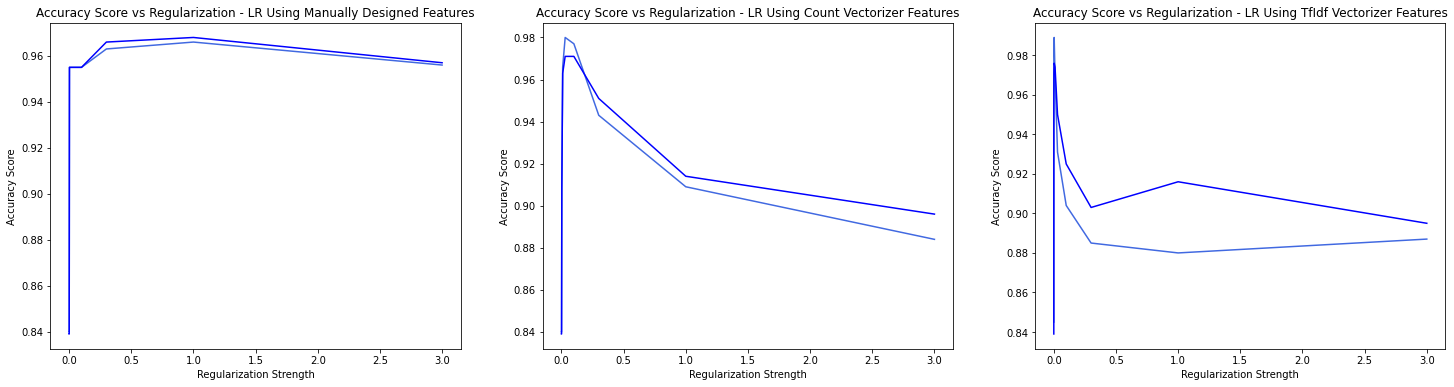

In [ ]:
# Initialize Plot
plt.figure(figsize=(25,6))

# Plot Accuracies vs Regularization Strength for Logistic Regression using manually designed features
plt.subplot(131)
mfd_train_acc = svm_val_sum['Training Accuracy'][svm_val_sum['Input Feature Types'] == 'Manual']
mfd_test_acc = svm_val_sum['Validation Accuracy'][svm_val_sum['Input Feature Types'] == 'Manual']
plt.plot(gam, mfd_train_acc, color='royalblue')
plt.plot(gam, mfd_test_acc, color='blue')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Regularization - LR Using Manually Designed Features')

# Plot Accuracies vs Regularization Strength for Logistic Regression using CountVectorizer features map
plt.subplot(132)
cv_train_acc = svm_val_sum['Training Accuracy'][svm_val_sum['Input Feature Types'] == 'CountVect']
cv_test_acc = svm_val_sum['Validation Accuracy'][svm_val_sum['Input Feature Types'] == 'CountVect']
plt.plot(gam, cv_train_acc, color='royalblue')
plt.plot(gam, cv_test_acc, color='blue')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Regularization - LR Using Count Vectorizer Features')

# Plot Accuracies vs Regularization Strength for Logistic Regression using Tfidf features map
plt.subplot(133)
tfidf_train_acc = svm_val_sum['Training Accuracy'][svm_val_sum['Input Feature Types'] == 'TfIdf']
tfidf_test_acc = svm_val_sum['Validation Accuracy'][svm_val_sum['Input Feature Types'] == 'TfIdf']
plt.plot(gam, tfidf_train_acc, color='royalblue')
plt.plot(gam, tfidf_test_acc, color='blue')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Regularization - LR Using TfIdf Vectorizer Features')

plt.show()

### iii. Model Evaluation

,Input Feature Types,Gamma,Training Accuracy,Testing Accuracy,F1-Score,AUC Score
0,Manual,1,0.966,0.968,0.896,0.986
1,CountVect,0.1,0.977,0.966,0.892,0.976
2,TfIdf,0.003,0.989,0.978,0.929,0.995


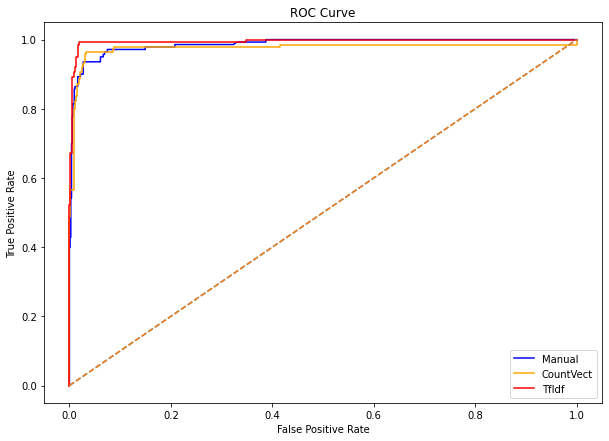

In [31]:
# Parameters Setup
metrics = ['Input Feature Types', 'Gamma', 'Training Accuracy', 'Testing Accuracy', 'F1-Score', 'AUC Score']
modelname = 'SVM'
kernel = 'sigmoid' # Using sigmoid kernal as this is a binary classfication problem
colors = ['blue', 'orange', 'red'] # indicates the corresponding color to represent in plot results

# Using Gamma=1 for SVM in Manually Designed Features
svm_mfd = SVC(kernel=kernel, gamma=1, probability=True)
svm_mfd_fit = svm_mfd.fit(X_train_mfd, y_train)
svm_mfd_trpred = svm_mfd.predict(X_train_mfd)
svm_mfd_tspred = svm_mfd.predict(X_test_mfd)
svm_mfd_tsprob = svm_mfd.predict_proba(X_test_mfd)
svm_mfd_tracc = accuracy_score(y_train, svm_mfd_trpred)
svm_mfd_tsacc = accuracy_score(y_test, svm_mfd_tspred)
svm_mfd_f1 = f1_score(y_test, svm_mfd_tspred)
svm_mfd_auc = roc_auc_score(y_test, svm_mfd_tsprob[:,1])
svm_mfd_fpr, svm_mfd_tpr, _ = roc_curve(y_test, svm_mfd_tsprob[:,1])

# Using Gamma=0.1 for SVM in CountVectorizer Features
svm_cv = SVC(kernel=kernel, gamma=0.1, probability=True)
svm_cv_fit = svm_cv.fit(X_train_cv, y_train)
svm_cv_trpred = svm_cv.predict(X_train_cv)
svm_cv_tspred = svm_cv.predict(X_test_cv)
svm_cv_tsprob = svm_cv.predict_proba(X_test_cv)
svm_cv_tracc = accuracy_score(y_train, svm_cv_trpred)
svm_cv_tsacc = accuracy_score(y_test, svm_cv_tspred)
svm_cv_f1 = f1_score(y_test, svm_cv_tspred)
svm_cv_auc = roc_auc_score(y_test, svm_cv_tsprob[:,1])
svm_cv_fpr, svm_cv_tpr, _ = roc_curve(y_test, svm_cv_tsprob[:,1])

# Using Gamma=0.003 for SVM in TfIdf Vectorizer Features
svm_tfidf = SVC(kernel=kernel, gamma=0.003, probability=True)
svm_tfidf_fit = svm_tfidf.fit(X_train_tfidf, y_train)
svm_tfidf_trpred = svm_tfidf.predict(X_train_tfidf)
svm_tfidf_tspred = svm_tfidf.predict(X_test_tfidf)
svm_tfidf_tsprob = svm_tfidf.predict_proba(X_test_tfidf)
svm_tfidf_tracc = accuracy_score(y_train, svm_tfidf_trpred)
svm_tfidf_tsacc = accuracy_score(y_test, svm_tfidf_tspred)
svm_tfidf_f1 = f1_score(y_test, svm_tfidf_tspred)
svm_tfidf_auc = roc_auc_score(y_test, svm_tfidf_tsprob[:,1])
svm_tfidf_fpr, svm_tfidf_tpr, _ = roc_curve(y_test, svm_tfidf_tsprob[:,1])

svm_tracc = [svm_mfd_tracc, svm_cv_tracc, svm_tfidf_tracc]
svm_tsacc = [svm_mfd_tsacc, svm_cv_tsacc, svm_tfidf_tsacc]
svm_f1 = [svm_mfd_f1, svm_cv_f1, svm_tfidf_f1]
svm_auc = [svm_mfd_auc, svm_cv_auc, svm_tfidf_auc]
svm_gamma = [1, 0.1, 0.003]
svm_labels = ['Manual', 'CountVect', 'TfIdf']
svm_fpr = [svm_mfd_fpr, svm_cv_fpr, svm_tfidf_fpr]
svm_tpr = [svm_mfd_tpr, svm_cv_tpr, svm_tfidf_tpr]

# Displaying final model evaluation
svm_sumarr = np.array([svm_labels, svm_gamma, svm_tracc, svm_tsacc, svm_f1, svm_auc]).transpose()
svm_sum = pd.DataFrame(svm_sumarr, columns=metrics)
for i in metrics[2:]:
  svm_sum[i] = svm_sum[i].apply(lambda x: round(float(x),3))

# Save Test Dataset Evaluation to File
folderpath = 'model/trad_model/model_evaluation/'
filepath = folderpath + modelname + '.csv'
svm_sum.to_csv(filepath, index=False)
display(svm_sum)

# Plot of ROC Curve
plt.figure(figsize=(10,7))
for i in np.arange(len(X_labels)):
  plt.plot(svm_fpr[i],svm_tpr[i], label=svm_labels[i], color=colors[i])
plt.plot([(0,0), (1,1)], linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### iv. Save Model

In [32]:
# Saving criteria Testing Acc >= 0.96, F1-Score >= 0.91
# SVM with BoW - TfIdf model
folderpath = 'model/trad_model/model_pickle/'
modelname = 'SVM_tfidf'
filepath = open(folderpath + modelname + '.pickle', 'wb')
pickle.dump(svm_tfidf, filepath)
filepath.close()

## 5) AdaBoost

### i. Model Training

In [ ]:
# Parameters Setup
metrics = ['Input Feature Types', 'Number of Trees', 'Max Features Per Tree', 'Training Accuracy', 'Validation Accuracy', 'F1-Score', 'AUC Score']
n_trees = [25, 50, 100] # number of trees in AdaBoost to try out
tree_depth = [1,2,4,10] # Depth of the weak learners (Decision Tree)
modelname = 'AdaBoost'

# Initialize
labels = []
tree = []
depth = []
tr_acc = []
tv_acc = []
F1 = []
auc = []
fpr = []
tpr = []

for i in range(len(X_labels)):
  for t in n_trees:
    for d in tree_depth:
      if d <= X_train[i].shape[1]:
        labels.append(X_labels[i])
        tree.append(t)
        depth.append(d)

        base = DecisionTreeClassifier(max_depth=d)
        ad = AdaBoostClassifier(n_estimators=t, base_estimator=base)
        ad_fit = ad.fit(X_train[i], y_train)

        # Predictions
        ad_trpred = ad.predict(X_train[i])
        ad_tvpred = ad.predict(X_val[i])
        ad_tvprob = ad.predict_proba(X_val[i])

        # Accuracies  
        tr_acc.append(accuracy_score(y_train, ad_trpred))
        tv_acc.append(accuracy_score(y_val, ad_tvpred))
        
        # F1 Score
        F1.append(f1_score(y_val, ad_tvpred))

        # AUC Score
        auc.append(roc_auc_score(y_val, ad_tvprob[:,1]))

# Training Evaluation Results
ad_val_sumarr = np.array([labels, tree, depth, tr_acc, tv_acc, F1, auc]).transpose()
ad_val_sum = pd.DataFrame(ad_val_sumarr, columns=metrics)
for i in metrics[3:]:
  ad_val_sum[i] = ad_val_sum[i].apply(lambda x: round(float(x),3))

# Save Training Evaluation Results
folderpath = 'model/trad_model/hyperparameter_tuning/'
filepath = folderpath + modelname + '.csv'
ad_val_sum.to_csv(filepath, index=False)

display(ad_val_sum)

,Input Feature Types,Number of Trees,Max Features Per Tree,Training Accuracy,Validation Accuracy,F1-Score,AUC Score
0,Manual,25,1,0.973,0.973,0.909,0.984
1,Manual,25,2,0.979,0.973,0.910,0.976
2,Manual,25,4,0.994,0.970,0.904,0.952
3,Manual,50,1,0.975,0.973,0.910,0.983
4,Manual,50,2,0.981,0.969,0.899,0.957
5,Manual,50,4,0.994,0.974,0.915,0.934
6,Manual,100,1,0.977,0.970,0.902,0.979
7,Manual,100,2,0.985,0.970,0.903,0.969
8,Manual,100,4,0.994,0.974,0.916,0.937
9,CountVect,25,1,0.954,0.962,0.875,0.970


### ii. Model Evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


,Input Feature Types,Number of Trees,Max Features Per Tree,Training Accuracy,Testing Accuracy,F1-Score,AUC Score
0,Manual,50,1,0.975,0.968,0.900,0.982
1,CountVect,100,1,0.987,0.958,0.861,0.985
2,TfIdf,100,1,0.987,0.958,0.861,0.985


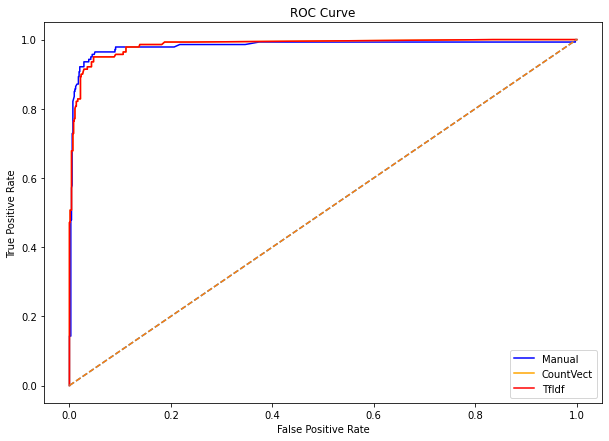

In [33]:
# Parameters Setup
metrics = ['Input Feature Types', 'Number of Trees', 'Max Features Per Tree', 'Training Accuracy', 'Testing Accuracy', 'F1-Score', 'AUC Score']
modelname = 'AdaBoost'
colors = ['blue', 'orange', 'red'] # indicates the corresponding color to represent in plot results

# Using num_trees=50, tree_depth=1 for AdaBoost in Manually Designed Features
base_mfd = DecisionTreeClassifier(max_depth=1)
ad_mfd = AdaBoostClassifier(n_estimators=50, base_estimator=base_mfd)
ad_mfd_fit = ad_mfd.fit(X_train_mfd, y_train)
ad_mfd_trpred = ad_mfd.predict(X_train_mfd)
ad_mfd_tspred = ad_mfd.predict(X_test_mfd)
ad_mfd_tsprob = ad_mfd.predict_proba(X_test_mfd)
ad_mfd_tracc = accuracy_score(y_train, ad_mfd_trpred)
ad_mfd_tsacc = accuracy_score(y_test, ad_mfd_tspred)
ad_mfd_f1 = f1_score(y_test, ad_mfd_tspred)
ad_mfd_auc = roc_auc_score(y_test, ad_mfd_tsprob[:,1])
ad_mfd_fpr, ad_mfd_tpr, _ = roc_curve(y_test, ad_mfd_tsprob[:,1])

# Using num_trees=100, tree_depth=1 for AdaBoost in CountVectorizer Features
base_cv = DecisionTreeClassifier(max_depth=1)
ad_cv = AdaBoostClassifier(n_estimators=100, base_estimator=base_cv)
ad_cv_fit = ad_cv.fit(X_train_cv, y_train)
ad_cv_trpred = ad_cv.predict(X_train_cv)
ad_cv_tspred = ad_cv.predict(X_test_cv)
ad_cv_tsprob = ad_cv.predict_proba(X_test_cv)
ad_cv_tracc = accuracy_score(y_train, ad_cv_trpred)
ad_cv_tsacc = accuracy_score(y_test, ad_cv_tspred)
ad_cv_f1 = f1_score(y_test, ad_cv_tspred)
ad_cv_auc = roc_auc_score(y_test, ad_cv_tsprob[:,1])
ad_cv_fpr, ad_cv_tpr, _ = roc_curve(y_test, ad_cv_tsprob[:,1])

# Using num_trees=100, tree_depth=1 for AdaBoost in TfIdf Vectorizer Features
base_tfidf = DecisionTreeClassifier(max_depth=1)
ad_tfidf = AdaBoostClassifier(n_estimators=100, base_estimator=base_tfidf)
ad_tfidf_fit = ad_tfidf.fit(X_train_tfidf, y_train)
ad_tfidf_trpred = ad_tfidf.predict(X_train_tfidf)
ad_tfidf_tspred = ad_tfidf.predict(X_test_tfidf)
ad_tfidf_tsprob = ad_tfidf.predict_proba(X_test_tfidf)
ad_tfidf_tracc = accuracy_score(y_train, ad_tfidf_trpred)
ad_tfidf_tsacc = accuracy_score(y_test, ad_tfidf_tspred)
ad_tfidf_f1 = f1_score(y_test, ad_tfidf_tspred)
ad_tfidf_auc = roc_auc_score(y_test, ad_tfidf_tsprob[:,1])
ad_tfidf_fpr, ad_tfidf_tpr, _ = roc_curve(y_test, ad_tfidf_tsprob[:,1])

ad_tracc = [ad_mfd_tracc, ad_cv_tracc, ad_tfidf_tracc]
ad_tsacc = [ad_mfd_tsacc, ad_cv_tsacc, ad_tfidf_tsacc]
ad_f1 = [ad_mfd_f1, ad_cv_f1, ad_tfidf_f1]
ad_auc = [ad_mfd_auc, ad_cv_auc, ad_tfidf_auc]
ad_tree = [50, 100, 100]
ad_depth = [1, 1, 1]
ad_labels = ['Manual', 'CountVect', 'TfIdf']
ad_fpr = [ad_mfd_fpr, ad_cv_fpr, ad_tfidf_fpr]
ad_tpr = [ad_mfd_tpr, ad_cv_tpr, ad_tfidf_tpr]

# Displaying final model evaluation
ad_sumarr = np.array([ad_labels, ad_tree, ad_depth, ad_tracc, ad_tsacc, ad_f1, ad_auc]).transpose()
ad_sum = pd.DataFrame(ad_sumarr, columns=metrics)
for i in metrics[3:]:
  ad_sum[i] = ad_sum[i].apply(lambda x: round(float(x),3))

# Save Test Dataset Evaluation to File
folderpath = 'model/trad_model/model_evaluation/'
filepath = folderpath + modelname + '.csv'
ad_sum.to_csv(filepath, index=False)
display(ad_sum)

# Plot of ROC Curve
plt.figure(figsize=(10,7))
for i in np.arange(len(X_labels)):
  plt.plot(ad_fpr[i],ad_tpr[i], label=ad_labels[i], color=colors[i])
plt.plot([(0,0), (1,1)], linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### iii. Save Model

In [34]:
# Saving criteria Testing Acc >= 0.96, F1-Score >= 0.91
# No AdaBoost model passes the criteria

## 6) K-Nearest Neighbour (KNN)

### i. Model Training

In [ ]:
# Parameters Setup
metrics = ['Input Feature Types', 'Nearest Neighbors', 'Training Accuracy', 'Validation Accuracy', 'F1-Score', 'AUC Score']
n_neighbor = [3, 5, 7, 9, 11] # different number of neighbors to try out
modelname = 'KNN'

colors = ['blue', 'orange', 'red'] # indicates the corresponding color to represent in plot results

# Initialize
labels = []
neighbor = []
tr_acc = []
tv_acc = []
F1 = []
auc = []
fpr = []
tpr = []

for i in range(len(X_labels)):
  for n in n_neighbor:
    labels.append(X_labels[i])
    neighbor.append(n)

    knn = KNeighborsClassifier(n_neighbors=n)
    knn_fit = knn.fit(X_train[i], y_train)

    # Predictions
    knn_trpred = knn.predict(X_train[i])
    knn_tvpred = knn.predict(X_val[i])
    knn_tvprob = knn.predict_proba(X_val[i])

    # Accuracies  
    tr_acc.append(accuracy_score(y_train, knn_trpred))
    tv_acc.append(accuracy_score(y_val, knn_tvpred))
    
    # F1 Score
    F1.append(f1_score(y_val, knn_tvpred))

    # AUC Score
    auc.append(roc_auc_score(y_val, knn_tvprob[:,1]))

# Training Evaluation Results
knn_val_sumarr = np.array([labels, neighbor, tr_acc, tv_acc, F1, auc]).transpose()
knn_val_sum = pd.DataFrame(knn_val_sumarr, columns=metrics)
for i in metrics[2:]:
  knn_val_sum[i] = knn_val_sum[i].apply(lambda x: round(float(x),3))

# Save Training Evaluation Results
folderpath = 'model/trad_model/hyperparameter_tuning/'
filepath = folderpath + modelname + '.csv'
knn_val_sum.to_csv(filepath, index=False)

display(knn_val_sum)

,Input Feature Types,Nearest Neighbors,Training Accuracy,Validation Accuracy,F1-Score,AUC Score
0,Manual,3,0.982,0.974,0.916,0.954
1,Manual,5,0.978,0.975,0.920,0.960
2,Manual,7,0.976,0.971,0.908,0.967
3,Manual,9,0.975,0.976,0.924,0.970
4,Manual,11,0.975,0.976,0.924,0.974
5,CountVect,3,0.946,0.917,0.651,0.842
6,CountVect,5,0.916,0.903,0.569,0.853
7,CountVect,7,0.897,0.880,0.407,0.853
8,CountVect,9,0.885,0.871,0.331,0.861
9,CountVect,11,0.874,0.864,0.270,0.852


### ii. Hyperparameter Tuning

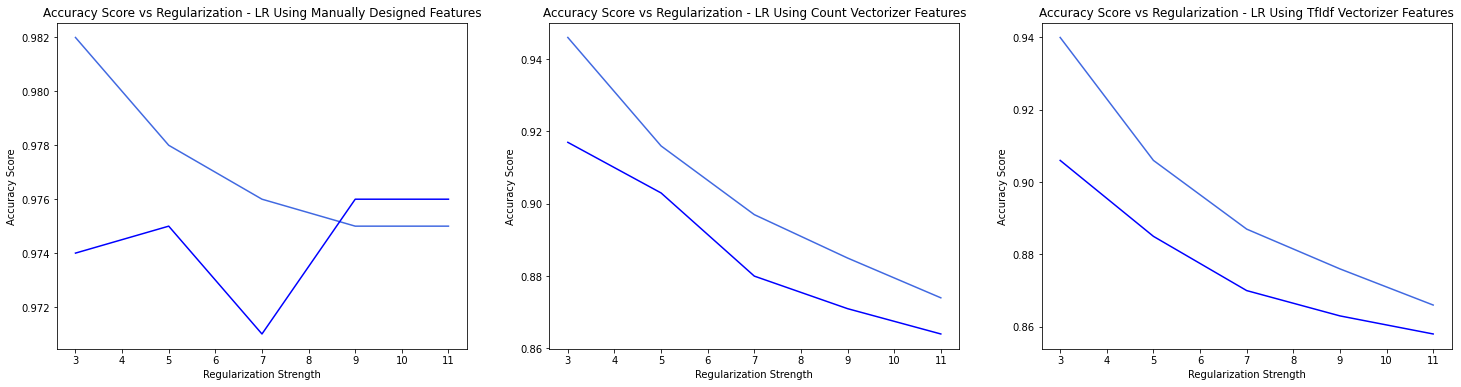

In [ ]:
# Initialize Plot
plt.figure(figsize=(25,6))

# Plot Accuracies vs Regularization Strength for Logistic Regression using manually designed features
plt.subplot(131)
mfd_train_acc = knn_val_sum['Training Accuracy'][knn_val_sum['Input Feature Types'] == 'Manual']
mfd_test_acc = knn_val_sum['Validation Accuracy'][knn_val_sum['Input Feature Types'] == 'Manual']
plt.plot(n_neighbor, mfd_train_acc, color='royalblue')
plt.plot(n_neighbor, mfd_test_acc, color='blue')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Regularization - LR Using Manually Designed Features')

# Plot Accuracies vs Regularization Strength for Logistic Regression using CountVectorizer features map
plt.subplot(132)
cv_train_acc = knn_val_sum['Training Accuracy'][knn_val_sum['Input Feature Types'] == 'CountVect']
cv_test_acc = knn_val_sum['Validation Accuracy'][knn_val_sum['Input Feature Types'] == 'CountVect']
plt.plot(n_neighbor, cv_train_acc, color='royalblue')
plt.plot(n_neighbor, cv_test_acc, color='blue')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Regularization - LR Using Count Vectorizer Features')

# Plot Accuracies vs Regularization Strength for Logistic Regression using Tfidf features map
plt.subplot(133)
tfidf_train_acc = knn_val_sum['Training Accuracy'][knn_val_sum['Input Feature Types'] == 'TfIdf']
tfidf_test_acc = knn_val_sum['Validation Accuracy'][knn_val_sum['Input Feature Types'] == 'TfIdf']
plt.plot(n_neighbor, tfidf_train_acc, color='royalblue')
plt.plot(n_neighbor, tfidf_test_acc, color='blue')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Regularization - LR Using TfIdf Vectorizer Features')

plt.show()

### iii. Model Evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


,Input Feature Types,Nearest Neighbors,Training Accuracy,Testing Accuracy,F1-Score,AUC Score
0,Manual,9,0.975,0.973,0.914,0.978
1,CountVect,3,0.946,0.919,0.660,0.853
2,TfIdf,3,0.940,0.908,0.593,0.842


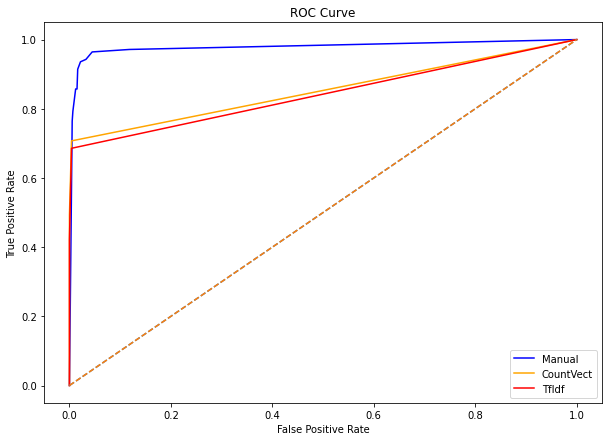

In [35]:
# Parameters Setup
metrics = ['Input Feature Types', 'Nearest Neighbors', 'Training Accuracy', 'Testing Accuracy', 'F1-Score', 'AUC Score']
modelname = 'KNN'
colors = ['blue', 'orange', 'red'] # indicates the corresponding color to represent in plot results

# Using num_neighbor=9 for KNN in Manually Designed Features
knn_mfd = KNeighborsClassifier(n_neighbors = 9)
knn_mfd_fit = knn_mfd.fit(X_train_mfd, y_train)
knn_mfd_trpred = knn_mfd.predict(X_train_mfd)
knn_mfd_tspred = knn_mfd.predict(X_test_mfd)
knn_mfd_tsprob = knn_mfd.predict_proba(X_test_mfd)
knn_mfd_tracc = accuracy_score(y_train, knn_mfd_trpred)
knn_mfd_tsacc = accuracy_score(y_test, knn_mfd_tspred)
knn_mfd_f1 = f1_score(y_test, knn_mfd_tspred)
knn_mfd_auc = roc_auc_score(y_test, knn_mfd_tsprob[:,1])
knn_mfd_fpr, knn_mfd_tpr, _ = roc_curve(y_test, knn_mfd_tsprob[:,1])

# Using num_neighbor=3 for KNN in CountVectorizer Features
knn_cv = KNeighborsClassifier(n_neighbors = 3)
knn_cv_fit = knn_cv.fit(X_train_cv, y_train)
knn_cv_trpred = knn_cv.predict(X_train_cv)
knn_cv_tspred = knn_cv.predict(X_test_cv)
knn_cv_tsprob = knn_cv.predict_proba(X_test_cv)
knn_cv_tracc = accuracy_score(y_train, knn_cv_trpred)
knn_cv_tsacc = accuracy_score(y_test, knn_cv_tspred)
knn_cv_f1 = f1_score(y_test, knn_cv_tspred)
knn_cv_auc = roc_auc_score(y_test, knn_cv_tsprob[:,1])
knn_cv_fpr, knn_cv_tpr, _ = roc_curve(y_test, knn_cv_tsprob[:,1])

# Using num_neighbor=3 for KNN in TfIdf Vectorizer Features
knn_tfidf = KNeighborsClassifier(n_neighbors = 3)
knn_tfidf_fit = knn_tfidf.fit(X_train_tfidf, y_train)
knn_tfidf_trpred = knn_tfidf.predict(X_train_tfidf)
knn_tfidf_tspred = knn_tfidf.predict(X_test_tfidf)
knn_tfidf_tsprob = knn_tfidf.predict_proba(X_test_tfidf)
knn_tfidf_tracc = accuracy_score(y_train, knn_tfidf_trpred)
knn_tfidf_tsacc = accuracy_score(y_test, knn_tfidf_tspred)
knn_tfidf_f1 = f1_score(y_test, knn_tfidf_tspred)
knn_tfidf_auc = roc_auc_score(y_test, knn_tfidf_tsprob[:,1])
knn_tfidf_fpr, knn_tfidf_tpr, _ = roc_curve(y_test, knn_tfidf_tsprob[:,1])

knn_tracc = [knn_mfd_tracc, knn_cv_tracc, knn_tfidf_tracc]
knn_tsacc = [knn_mfd_tsacc, knn_cv_tsacc, knn_tfidf_tsacc]
knn_f1 = [knn_mfd_f1, knn_cv_f1, knn_tfidf_f1]
knn_auc = [knn_mfd_auc, knn_cv_auc, knn_tfidf_auc]
knn_neighbor = [9, 3, 3]
knn_labels = ['Manual', 'CountVect', 'TfIdf']
knn_fpr = [knn_mfd_fpr, knn_cv_fpr, knn_tfidf_fpr]
knn_tpr = [knn_mfd_tpr, knn_cv_tpr, knn_tfidf_tpr]

# Displaying final model evaluation
knn_sumarr = np.array([knn_labels, knn_neighbor, knn_tracc, knn_tsacc, knn_f1, knn_auc]).transpose()
knn_sum = pd.DataFrame(knn_sumarr, columns=metrics)
for i in metrics[2:]:
  knn_sum[i] = knn_sum[i].apply(lambda x: round(float(x),3))

# Save Test Dataset Evaluation to File
folderpath = 'model/trad_model/model_evaluation/'
filepath = folderpath + modelname + '.csv'
knn_sum.to_csv(filepath, index=False)
display(knn_sum)

# Plot of ROC Curve
plt.figure(figsize=(10,7))
for i in np.arange(len(X_labels)):
  plt.plot(knn_fpr[i],knn_tpr[i], label=knn_labels[i], color=colors[i])
plt.plot([(0,0), (1,1)], linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### iv. Save Model

In [36]:
# Saving criteria Testing Acc >= 0.96, F1-Score >= 0.91
# Knn - Manually Design Features
folderpath = 'model/trad_model/model_pickle/'
modelname = 'knn_mfd'
filepath = open(folderpath + modelname + '.pickle', 'wb')
pickle.dump(knn_mfd, filepath)
filepath.close()

# Summary

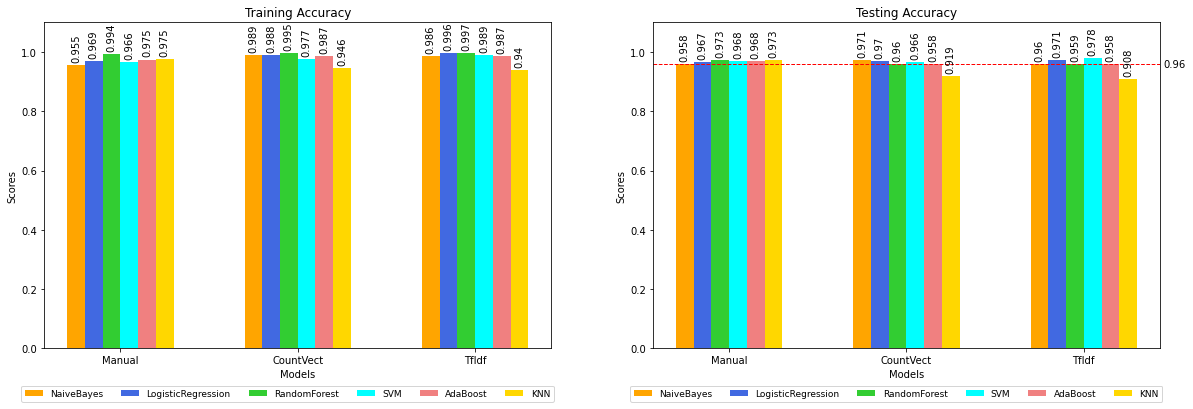

--------------------------------------------------------------------------------------------------------------------------------------------------------



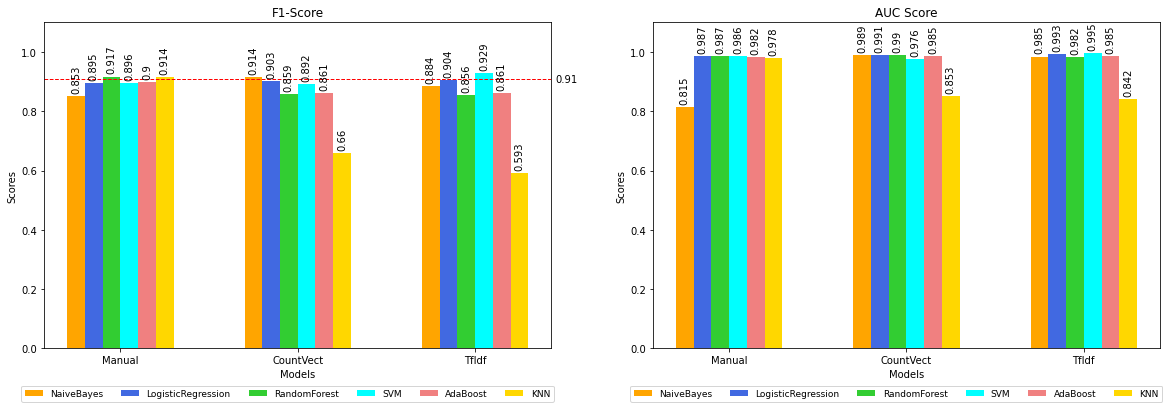

In [37]:
# Plotting Bar Chart for comparision
header = ['Feature Map'] + X_labels
model_labels = ['NaiveBayes', 'LogisticRegression', 'RandomForest', 'SVM', 'AdaBoost', 'KNN']
z = np.arange(3)
width = 0.1

plt.figure(figsize=(20,6))
# Plot Training Accuracy Comparison
plt.subplot(121)
plt.bar(z-0.25, NB_tracc, width, color='orange')
plt.bar(z-0.15, lr_tracc, width, color='royalblue')
plt.bar(z-0.05, rf_tracc, width, color='limegreen')
plt.bar(z+0.05, svm_tracc, width, color='aqua')
plt.bar(z+0.15, ad_tracc, width, color='lightcoral')
plt.bar(z+0.25, knn_tracc, width, color='gold')
for i in np.arange(len(X_labels)):
  plt.text(i-0.25, NB_tracc[i]+0.01, round(NB_tracc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i-0.15, lr_tracc[i]+0.01, round(lr_tracc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i-0.05, rf_tracc[i]+0.01, round(rf_tracc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i+0.05, svm_tracc[i]+0.01, round(svm_tracc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i+0.15, ad_tracc[i]+0.01, round(ad_tracc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i+0.25, knn_tracc[i]+0.01, round(knn_tracc[i], 3), ha="center", va="bottom", rotation='vertical')
plt.xticks(z, X_labels)
plt.ylim(0,1.1)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(model_labels, loc='upper center', bbox_to_anchor=(0.48, -0.1), ncol=6, prop={'size': 9})
plt.title('Training Accuracy')

# Plot Testing Accuracy Comparison
plt.subplot(122)
plt.bar(z-0.25, NB_tsacc, width, color='orange')
plt.bar(z-0.15, lr_tsacc, width, color='royalblue')
plt.bar(z-0.05, rf_tsacc, width, color='limegreen')
plt.bar(z+0.05, svm_tsacc, width, color='aqua')
plt.bar(z+0.15, ad_tsacc, width, color='lightcoral')
plt.bar(z+0.25, knn_tsacc, width, color='gold')
for i in np.arange(len(X_labels)):
  plt.text(i-0.25, NB_tsacc[i]+0.01, round(NB_tsacc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i-0.15, lr_tsacc[i]+0.01, round(lr_tsacc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i-0.05, rf_tsacc[i]+0.01, round(rf_tsacc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i+0.05, svm_tsacc[i]+0.01, round(svm_tsacc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i+0.15, ad_tsacc[i]+0.01, round(ad_tsacc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i+0.25, knn_tsacc[i]+0.01, round(knn_tsacc[i], 3), ha="center", va="bottom", rotation='vertical')
plt.xticks(z, X_labels)
plt.ylim(0,1.1)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(model_labels, loc='upper center', bbox_to_anchor=(0.48, -0.1), ncol=6, prop={'size': 9})
plt.axhline(y=0.96, color='r', linestyle='--', linewidth=1)
plt.text(2.45,0.95,'0.96')

plt.title('Testing Accuracy')

plt.show()
print('--------------------------------------------------------------------------------------------------------------------------------------------------------\n')

plt.figure(figsize=(20,6))
# Plot f1 Score Comparison
plt.subplot(121)
plt.bar(z-0.25, NB_f1, width, color='orange')
plt.bar(z-0.15, lr_f1, width, color='royalblue')
plt.bar(z-0.05, rf_f1, width, color='limegreen')
plt.bar(z+0.05, svm_f1, width, color='aqua')
plt.bar(z+0.15, ad_f1, width, color='lightcoral')
plt.bar(z+0.25, knn_f1, width, color='gold')
for i in np.arange(len(X_labels)):
  plt.text(i-0.25, NB_f1[i]+0.01, round(NB_f1[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i-0.15, lr_f1[i]+0.01, round(lr_f1[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i-0.05, rf_f1[i]+0.01, round(rf_f1[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i+0.05, svm_f1[i]+0.01, round(svm_f1[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i+0.15, ad_f1[i]+0.01, round(ad_f1[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i+0.25, knn_f1[i]+0.01, round(knn_f1[i], 3), ha="center", va="bottom", rotation='vertical')
plt.xticks(z, X_labels)
plt.ylim(0,1.1)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(model_labels, loc='upper center', bbox_to_anchor=(0.48, -0.1), ncol=6, prop={'size': 9})
plt.axhline(y=0.91, color='r', linestyle='--', linewidth=1)
plt.text(2.45,0.9,'0.91')
plt.title('F1-Score')

# Plot AUC Score Comparison
plt.subplot(122)
plt.bar(z-0.25, NB_auc, width, color='orange')
plt.bar(z-0.15, lr_auc, width, color='royalblue')
plt.bar(z-0.05, rf_auc, width, color='limegreen')
plt.bar(z+0.05, svm_auc, width, color='aqua')
plt.bar(z+0.15, ad_auc, width, color='lightcoral')
plt.bar(z+0.25, knn_auc, width, color='gold')
for i in np.arange(len(X_labels)):
  plt.text(i-0.25, NB_auc[i]+0.01, round(NB_auc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i-0.15, lr_auc[i]+0.01, round(lr_auc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i-0.05, rf_auc[i]+0.01, round(rf_auc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i+0.05, svm_auc[i]+0.01, round(svm_auc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i+0.15, ad_auc[i]+0.01, round(ad_auc[i], 3), ha="center", va="bottom", rotation='vertical')
  plt.text(i+0.25, knn_auc[i]+0.01, round(knn_auc[i], 3), ha="center", va="bottom", rotation='vertical')
plt.xticks(z, X_labels)
plt.ylim(0,1.1)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(model_labels, loc='upper center', bbox_to_anchor=(0.48, -0.1), ncol=6, prop={'size': 9})
plt.title('AUC Score')

plt.show()


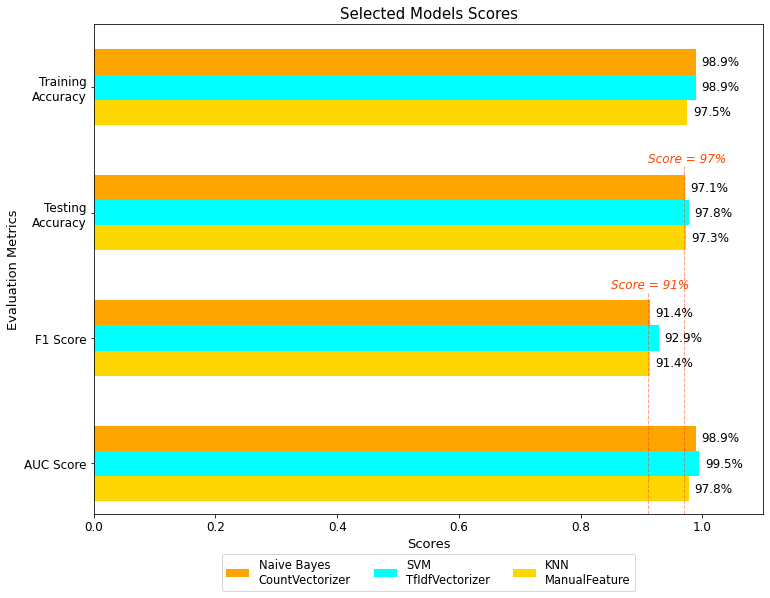

In [56]:
# Selected Models for Deployment
sel_models = ['Naive Bayes\nCountVectorizer', 'SVM\nTfIdfVectorizer', 'KNN\nManualFeature']
sel_metrics = ['Training\nAccuracy', 'Testing\nAccuracy', 'F1 Score', 'AUC Score'][::-1]

NB_cv_eval = [NB_cv_tracc, NB_cv_tsacc, NB_cv_f1, NB_cv_auc][::-1]
# rf_mfd_eval = [rf_mfd_tracc, rf_mfd_tsacc, rf_mfd_f1, rf_mfd_auc][::-1]
svm_tfidf_eval = [svm_tfidf_tracc, svm_tfidf_tsacc, svm_tfidf_f1, svm_tfidf_auc][::-1]
knn_mfd_eval = [knn_mfd_tracc, knn_mfd_tsacc, knn_mfd_f1, knn_mfd_auc][::-1]

width = 0.2
q = np.arange(len(NB_cv_eval))

plt.figure(figsize=(12,9))
plt.barh(q+0.2, NB_cv_eval, width, color='orange')
# plt.barh(q+0.08, rf_mfd_eval, width, color='limegreen')
plt.barh(q, svm_tfidf_eval, width, color='aqua')
plt.barh(q-0.2, knn_mfd_eval, width, color='gold')

for i in np.arange(len(NB_cv_eval)):
  plt.text(NB_cv_eval[i]+0.04, i+0.15, str(round(NB_cv_eval[i]*100,1))+'%', ha="center", va="bottom", fontsize=12)
  # plt.text(rf_mfd_eval[i]+0.04, i+0.03, str(round(rf_mfd_eval[i]*100,1))+'%', ha="center", va="bottom", fontsize=12)
  plt.text(svm_tfidf_eval[i]+0.04, i-0.05, str(round(svm_tfidf_eval[i]*100,1))+'%', ha="center", va="bottom", fontsize=12)
  plt.text(knn_mfd_eval[i]+0.04, i-0.25, str(round(knn_mfd_eval[i]*100,1))+'%', ha="center", va="bottom", fontsize=12)
plt.legend(sel_models, loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=6, prop={'size': 11.5})
plt.yticks(q, sel_metrics, fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-0.4,3.5)
plt.xlim(0,1.1)

plt.vlines(x=0.91, ymin=-0.4, ymax=1.37, color='orangered', linestyle='--', linewidth=1, alpha=0.5)
plt.text(0.85,1.4,'Score = 91%', color='orangered', fontsize=12, style='italic')

plt.vlines(x=0.97, ymin=-0.4, ymax=2.37, color='orangered', linestyle='--', linewidth=1, alpha=0.5)
plt.text(0.91,2.4,'Score = 97%', color='orangered', fontsize=12, style='italic')

plt.xlabel('Scores', fontsize=13)
plt.ylabel('Evaluation Metrics', fontsize=13)
plt.title('Selected Models Scores', fontsize=15)

plt.show()


# plt.axhline(y=0.91, color='r', linestyle='--', linewidth=1)
# plt.text(2.45,0.9,'0.91')
